# Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)

# Download file

In [2]:
file_id = "1DopC7bm_EWX_ocqbOIkME9usE5rG3pZE" # ID of the file on Google Drive
file_name = 'Customer_data_2021&2022.csv'

%run download.ipynb

# Import data

In [3]:
# File path
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
file_path = os.path.join(parent_dir, 'Data',file_name)

df = pd.read_csv(file_path)
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,RACING_TURNOVER,SPORT_TURNOVER,FOB_TURNOVER,PARI_TURNOVER,TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,WIN_LOSS_RATIO,MARGIN_RATE,TICKETS
0,2021-01-01,Fri,13154,67.00,1118.00,NaN,37.00,1081.00,1118.00,443.55,271.25,0.40,0.24,288
1,2021-01-01,Fri,18379,54.00,40.00,NaN,40.00,NaN,40.00,0.00,40.00,0.00,1.00,1
2,2021-01-01,Fri,559232,63.00,12.00,NaN,NaN,12.00,12.00,9.50,2.04,0.79,0.17,5
3,2021-01-01,Fri,698904,69.00,1223.50,NaN,NaN,1223.50,1223.50,267.91,245.12,0.22,0.20,40
4,2021-01-01,Fri,762921,67.00,17.50,NaN,NaN,17.50,17.50,0.00,3.50,0.00,0.20,5


# EDA

## Column type conversion

In [4]:
# DATE_DIM: datetime
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'], format='%Y-%m-%d')

# BET_ACCOUNT_NUM_HASH: string
df['BET_ACCOUNT_NUM_HASH'] = df['BET_ACCOUNT_NUM_HASH'].astype('O')

## Missing value imputation

In [5]:
# No of missing values by columns
df.isna().sum()

DATE_DIM                       0
DAY_OF_WEEK                    0
BET_ACCOUNT_NUM_HASH           0
AGE                         2676
RACING_TURNOVER           959303
SPORT_TURNOVER          10575105
FOB_TURNOVER             2701974
PARI_TURNOVER            3829864
TURNOVER                       0
DIVIDENDS_PAID                 0
GROSS_MARGIN                   0
WIN_LOSS_RATIO                 0
MARGIN_RATE                    0
TICKETS                        0
dtype: int64

2676 records are missing on 'AGE' column. Nan values on TURNOVER columns indicate zero value.

In [128]:
# See if it is possble impute age
missing_age_lst = df.loc[df['AGE'].isna(), 'BET_ACCOUNT_NUM_HASH'].unique()

df[df['BET_ACCOUNT_NUM_HASH'].isin(missing_age_lst)].groupby('BET_ACCOUNT_NUM_HASH', as_index=False).AGE.min()

,BET_ACCOUNT_NUM_HASH,AGE
0,708049310,NaN
1,786895907,NaN
2,1080370257,NaN
3,1208532057,NaN
4,2100229039,NaN
5,2969320105,NaN
6,3111443700,NaN
7,3387748523,NaN
8,3461584997,NaN
9,3512123314,NaN


## Customer

In [121]:
cus_df = df.groupby('BET_ACCOUNT_NUM_HASH', as_index=False) \
            .agg({'AGE': 'max', 
                  'DATE_DIM': ['min', 'max', 'count'],
                  'RACING_TURNOVER' : 'sum', 
                  'SPORT_TURNOVER' : 'sum', 
                  'FOB_TURNOVER' : 'sum', 
                  'PARI_TURNOVER' : 'sum', 
                  'TURNOVER' : 'sum', 
                  'DIVIDENDS_PAID' : 'sum',
                  'GROSS_MARGIN' : 'sum', 
                  'TICKETS' : 'sum'})

cus_df.columns = ["_".join(x) if x[0] == "DATE_DIM" else x[0] for x in cus_df.columns.ravel() ];

cus_df['RACING_TURNOVER_PER'] = cus_df['RACING_TURNOVER'] / cus_df['TURNOVER'] * 100
cus_df['SPORT_TURNOVER_PER'] = cus_df['SPORT_TURNOVER'] / cus_df['TURNOVER'] * 100
cus_df['FOB_TURNOVER_PER'] = cus_df['FOB_TURNOVER'] / cus_df['TURNOVER'] * 100
cus_df['PARI_TURNOVER_PER'] = cus_df['PARI_TURNOVER'] / cus_df['TURNOVER'] * 100

cus_df.head();

C:\Users\duc.nguyen\AppData\Local\Temp\ipykernel_23088\3484935157.py:13: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  cus_df.columns = ["_".join(x) if x[0] == "DATE_DIM" else x[0] for x in cus_df.columns.ravel() ];


In [30]:
cus_df.shape[0]

df.loc[df['DATE_DIM'].dt.year == 2021, 'BET_ACCOUNT_NUM_HASH'].nunique()

df.loc[df['DATE_DIM'].dt.year == 2022, 'BET_ACCOUNT_NUM_HASH'].nunique()

In [31]:
cus_df.describe()

,AGE,DATE_DIM_count,RACING_TURNOVER,SPORT_TURNOVER,FOB_TURNOVER,PARI_TURNOVER,TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
count,144867.00,144877.00,144877.00,144877.00,144877.00,144877.00,144877.00,144877.00,144877.00,144877.00
mean,43.68,85.36,13580.20,1575.24,8892.53,6262.92,15155.45,12527.94,2365.19,1888.08
std,15.93,142.09,55655.85,22389.91,47384.05,28982.81,61888.19,54219.50,9365.80,8881.82
min,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-327327.36,1.00
25%,31.00,3.00,100.00,0.00,75.00,11.00,163.00,73.10,20.00,17.00
50%,41.00,18.00,722.00,5.00,491.00,138.00,992.50,738.18,150.00,101.00
75%,55.00,98.00,5965.00,139.00,3605.00,1492.50,7070.00,5905.03,1060.38,700.00
max,104.00,730.00,5234120.84,2849523.33,4399559.00,3599772.50,5544861.46,4507251.65,467391.88,699955.00


In [106]:
cus_df[['AGE', 'DATE_DIM_count', 'TURNOVER', 'DIVIDENDS_PAID', 'TICKETS']].corr()

,AGE,DATE_DIM_count,TURNOVER,DIVIDENDS_PAID,TICKETS
AGE,1.00,0.36,0.10,0.08,0.12
DATE_DIM_count,0.36,1.00,0.44,0.41,0.48
TURNOVER,0.10,0.44,1.00,0.99,0.35
DIVIDENDS_PAID,0.08,0.41,0.99,1.00,0.30
TICKETS,0.12,0.48,0.35,0.30,1.00


In [33]:
np.corrcoef(np.log(cus_df['TURNOVER']+1), np.log(cus_df['TICKETS']+1))

array([[1.        , 0.87787383],
       [0.87787383, 1.        ]])

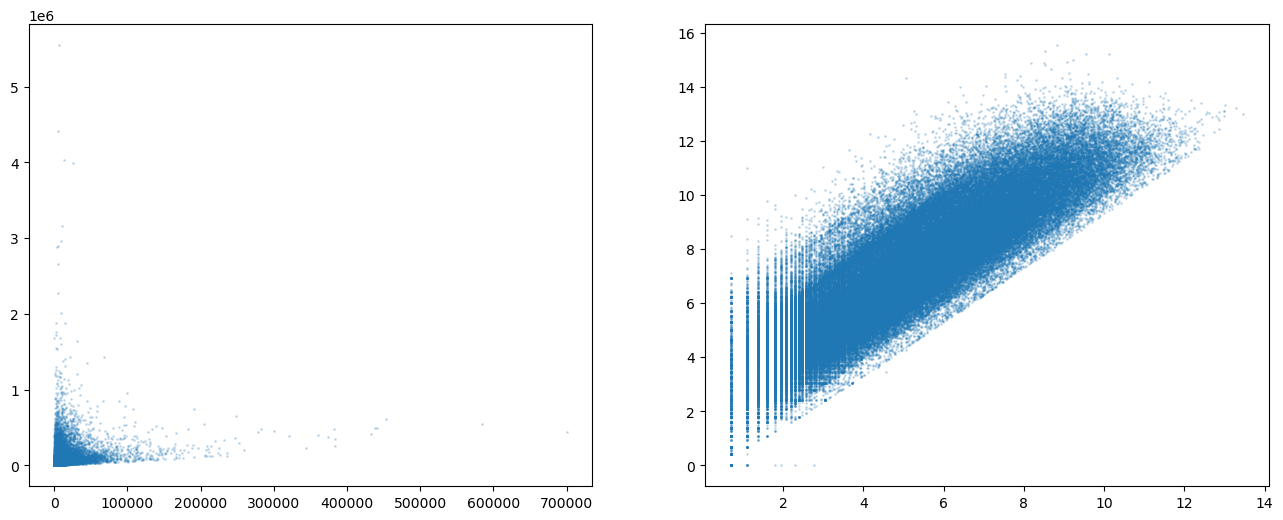

In [127]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

ax[0].scatter(cus_df['TICKETS'] , cus_df['TURNOVER'] , s=1, alpha=0.2)
ax[1].scatter(np.log(cus_df['TICKETS']+1) , np.log(cus_df['TURNOVER']+1) , s=1, alpha=0.2)

In [35]:
age_mean = round(cus_df['AGE'].mean()) ## 44

cus_df.fillna(age_mean, inplace=True)

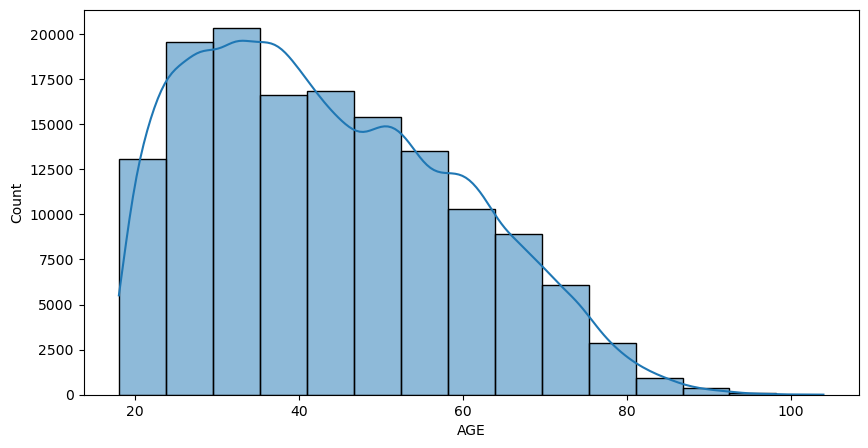

In [36]:
fig, ax = plt.subplots(1, figsize=(10,5))

sns.histplot(cus_df['AGE'], kde=True, bins=15)

plt.show();

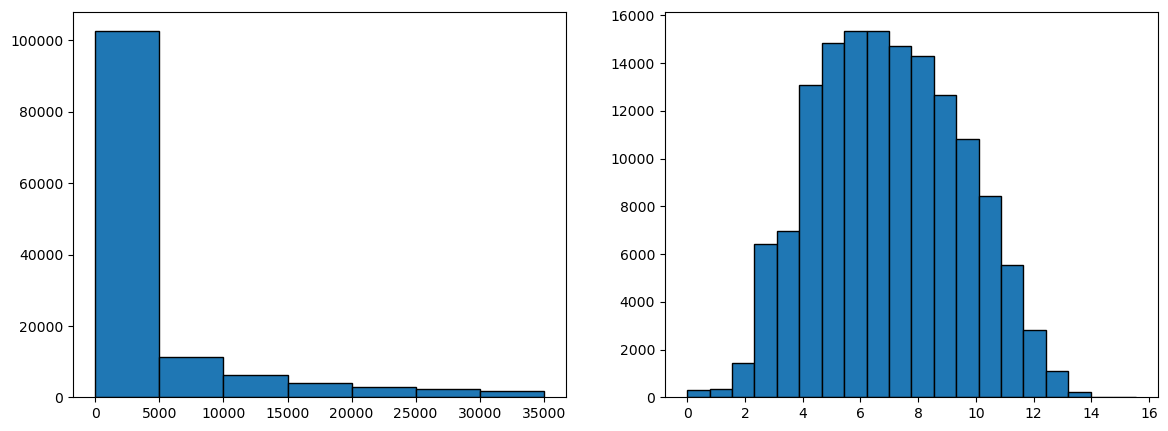

In [37]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

bins = range(0,40000, 5000)
ax[0].hist(cus_df['TURNOVER'], bins=bins, edgecolor='black')

log_turnover = np.log(cus_df['TURNOVER']+1)
ax[1].hist(log_turnover, bins=20, edgecolor='black')

plt.show();

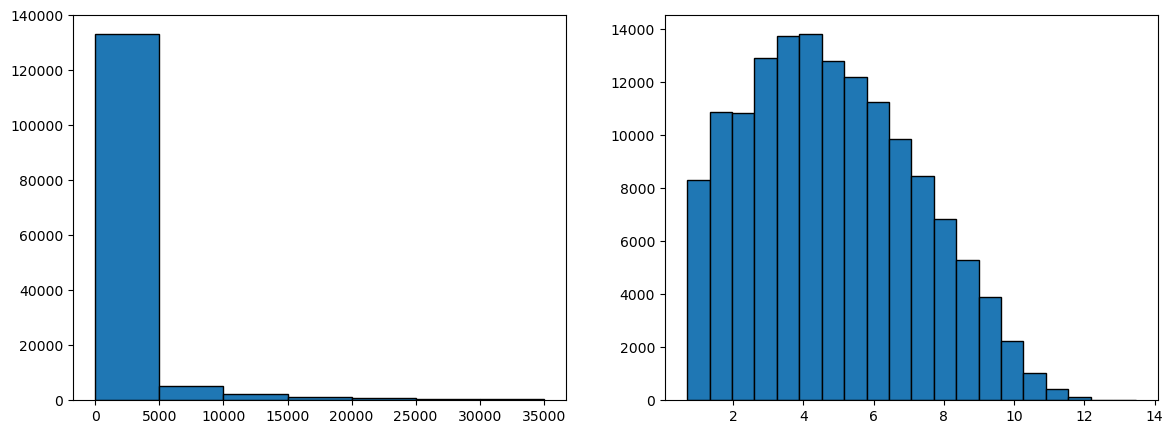

In [38]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

bins = range(0,40000, 5000)
ax[0].hist(cus_df['TICKETS'], bins=bins, edgecolor='black')

log_turnover = np.log(cus_df['TICKETS']+1)
ax[1].hist(log_turnover, bins=20, edgecolor='black')

plt.show();

(array([ 11338.,   1777.,   1701.,   1796.,   2050.,   2504.,   3039.,
          4106.,   7417., 109105.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

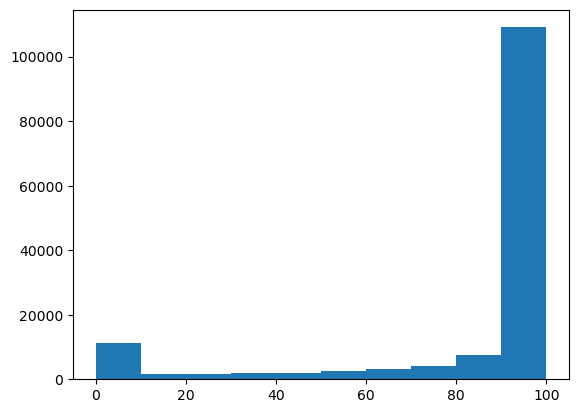

In [56]:
plt.hist(cus_df['RACING_TURNOVER_PER'], bins=10)

(array([50091., 14999., 12393., 10366.,  9348.,  8728.,  7712.,  7077.,
         7125., 16994.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

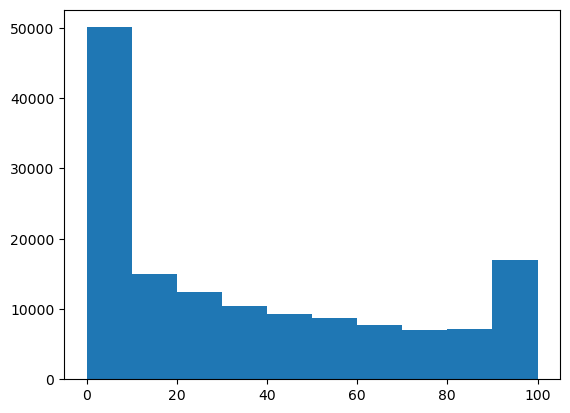

In [60]:
plt.hist(cus_df['PARI_TURNOVER_PER'], bins=10)

<Axes: xlabel='DATE_DIM'>

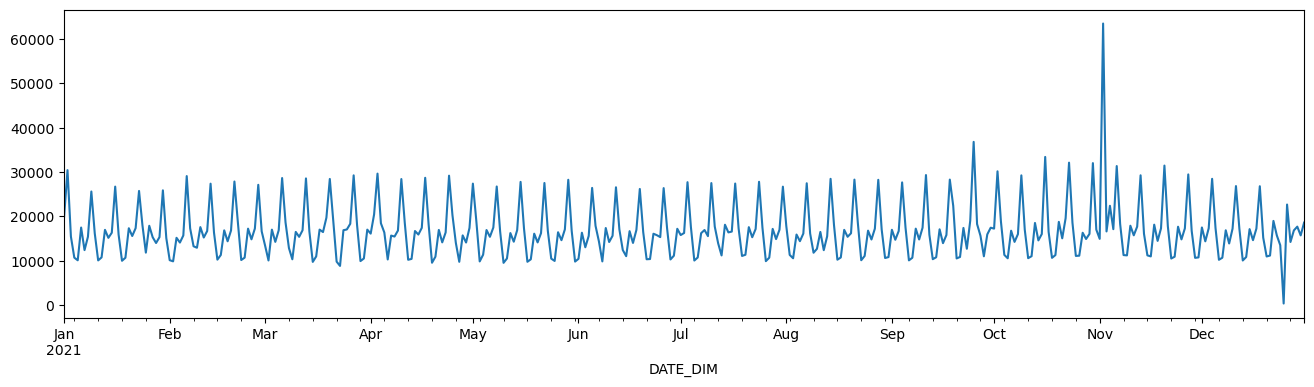

In [105]:
plt.figure(figsize=(16,4))

cus_num_df = df_agg.resample('d').BET_ACCOUNT_NUM_HASH.count()

cus_num_df[:365].plot()

In [109]:
df_turnover = df.set_index('DATE_DIM').resample('d')[['RACING_TURNOVER', 'SPORT_TURNOVER', 'FOB_TURNOVER', 'PARI_TURNOVER', 'TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS']].sum()
df_turnover['RACING_TURNOVER_PER'] = df_turnover['RACING_TURNOVER'] / df_turnover['TURNOVER'] * 100
df_turnover['SPORT_TURNOVER_PER'] = df_turnover['SPORT_TURNOVER'] / df_turnover['TURNOVER'] * 100
df_turnover['FOB_TURNOVER_PER'] = df_turnover['FOB_TURNOVER'] / df_turnover['TURNOVER'] * 100
df_turnover['PARI_TURNOVER_PER'] = df_turnover['PARI_TURNOVER'] / df_turnover['TURNOVER'] * 100
df_turnover

,RACING_TURNOVER,SPORT_TURNOVER,FOB_TURNOVER,PARI_TURNOVER,TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS,RACING_TURNOVER_PER,SPORT_TURNOVER_PER,FOB_TURNOVER_PER,PARI_TURNOVER_PER
DATE_DIM,,,,,,,,,,,,
2021-01-01,3677157.56,160587.45,1902630.00,1935115.01,3837745.01,3117143.65,611881.33,488336,95.82,4.18,49.58,50.42
2021-01-02,5912241.48,257703.55,3591432.50,2578512.53,6169945.03,4954599.14,1109035.03,698384,95.82,4.18,58.21,41.79
2021-01-03,1871370.98,336212.21,1271655.50,935927.69,2207583.19,1841094.03,324655.16,280780,84.77,15.23,57.60,42.40
2021-01-04,1207880.74,322013.93,914797.50,615097.17,1529894.67,1295588.11,197903.31,194882,78.95,21.05,59.79,40.21
2021-01-05,1257028.61,225146.21,828628.50,653546.32,1482174.82,1215165.78,251711.36,201692,84.81,15.19,55.91,44.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2104208.41,312304.83,1459254.83,957258.41,2416513.24,1929425.61,396742.33,311277,87.08,12.92,60.39,39.61
2022-12-28,3122153.76,259782.31,2003817.31,1378118.76,3381936.07,2827784.11,506399.19,428955,92.32,7.68,59.25,40.75
2022-12-29,2579856.72,285099.77,1778191.77,1086764.72,2864956.49,2419908.72,372956.92,361846,90.05,9.95,62.07,37.93


In [111]:
df_turnover_2021 = df_turnover[df_turnover.index.year == 2021]
df_turnover_2022 = df_turnover[df_turnover.index.year == 2022]

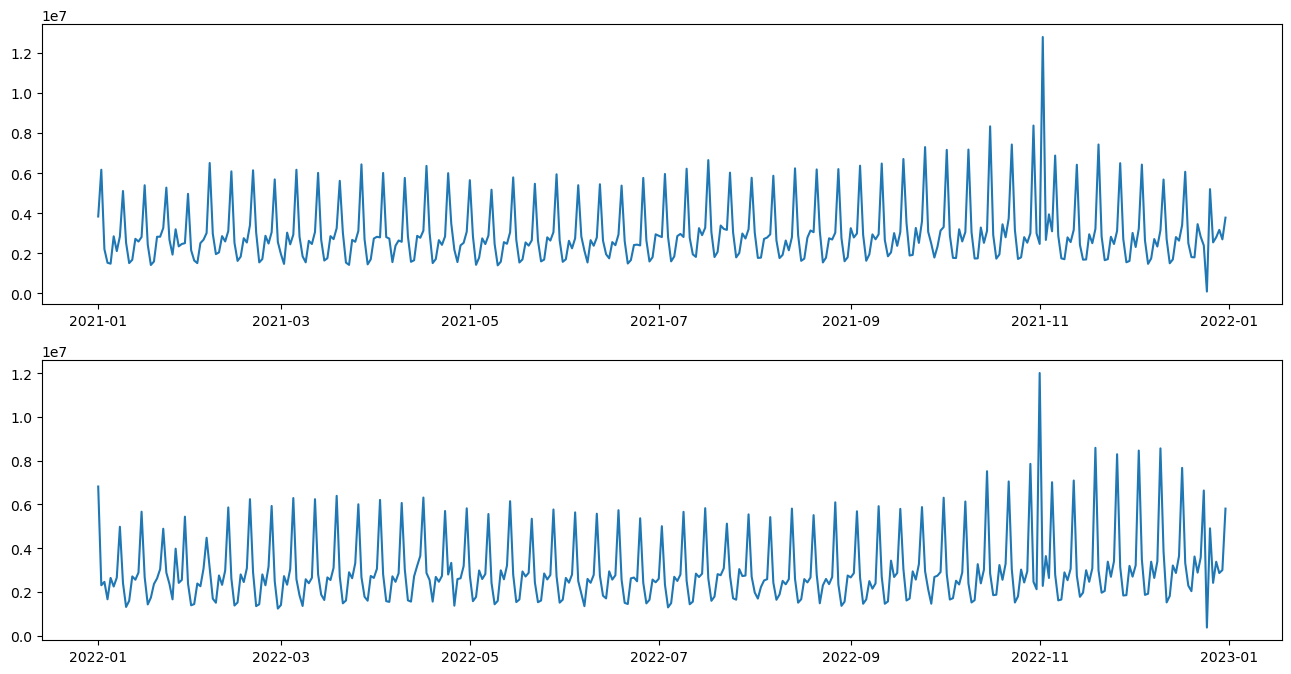

In [45]:
fig, ax = plt.subplots(2, figsize=(16,8))

ax[0].plot(df_turnover_2021['TURNOVER'])
ax[1].plot(df_turnover_2022['TURNOVER'])

In [53]:
max_date = df_turnover_2021.TURNOVER.argmax()

df_turnover_2021[max_date:max_date+1]

,RACING_TURNOVER,SPORT_TURNOVER,FOB_TURNOVER,PARI_TURNOVER,TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
DATE_DIM,,,,,,,,
2021-11-02,12562228.72,229941.20,6888078.20,5904091.72,12792169.92,10608690.48,2051204.00,1488646


In [47]:
min_date = df_turnover_2021.TURNOVER.argmin()

df_turnover_2021[min_date:min_date+1]

,RACING_TURNOVER,SPORT_TURNOVER,FOB_TURNOVER,PARI_TURNOVER,TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
DATE_DIM,,,,,,,,
2021-12-25,0.00,93015.86,93015.86,0.00,93015.86,93317.98,-302.12,1830


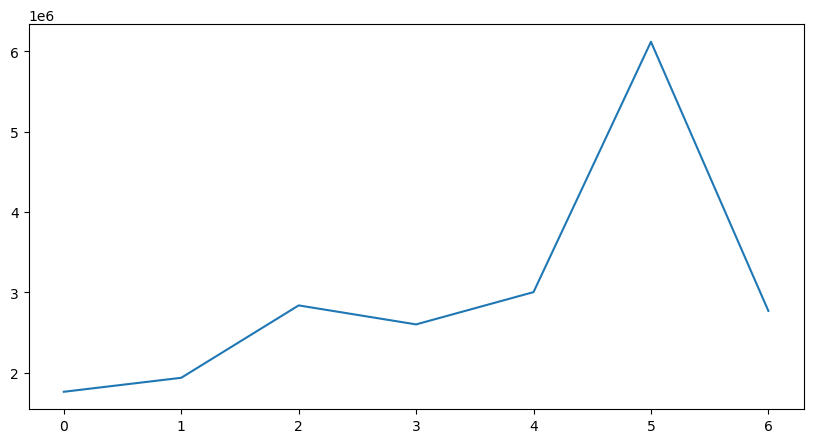

In [48]:
df_weekly = df_turnover.groupby(df_turnover.index.weekday).TURNOVER.mean()

fig, ax = plt.subplots(1, figsize=(10,5))

ax.plot(df_weekly)

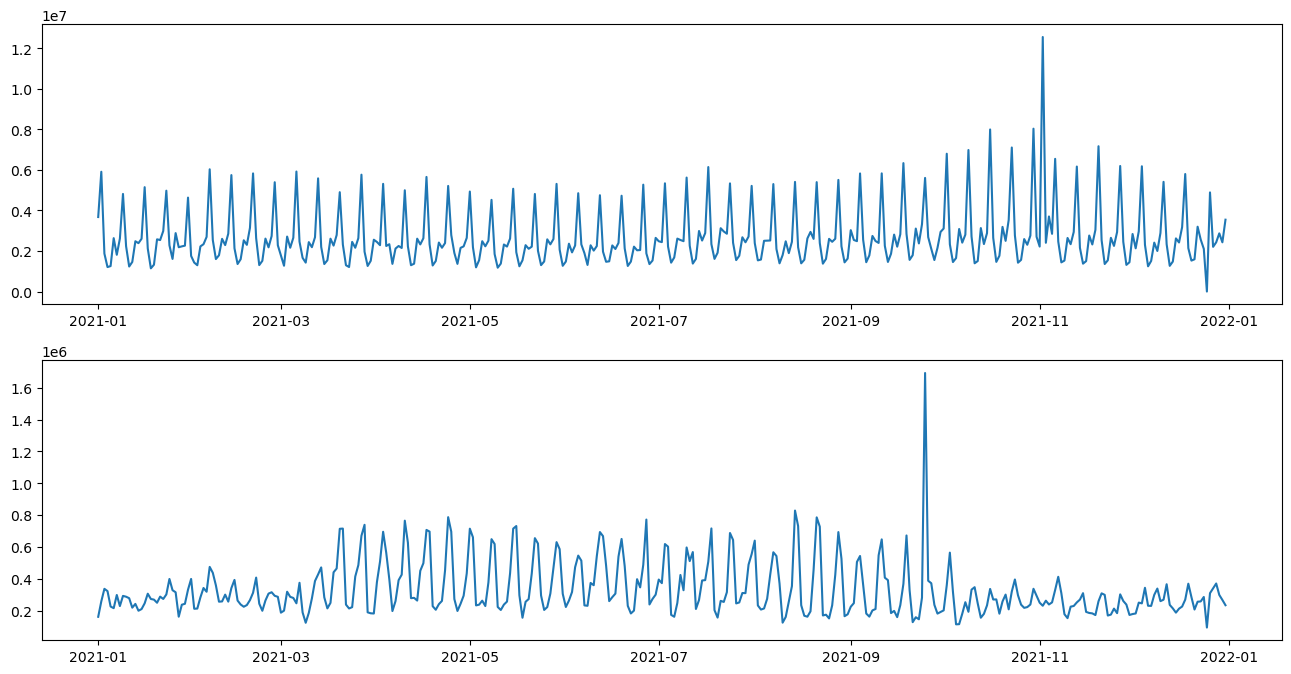

In [50]:
fig, ax = plt.subplots(2, figsize=(16,8))

ax[0].plot(df_turnover_2021['RACING_TURNOVER'])
ax[1].plot(df_turnover_2021['SPORT_TURNOVER'])

In [63]:
max_date = df_turnover_2021['SPORT_TURNOVER'].argmax()
df_turnover_2021[max_date:max_date+1]

,RACING_TURNOVER,SPORT_TURNOVER,FOB_TURNOVER,PARI_TURNOVER,TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
DATE_DIM,,,,,,,,
2021-09-25,5607560.26,1692086.48,5175619.32,2124027.42,7299646.74,6240649.59,926383.51,722438


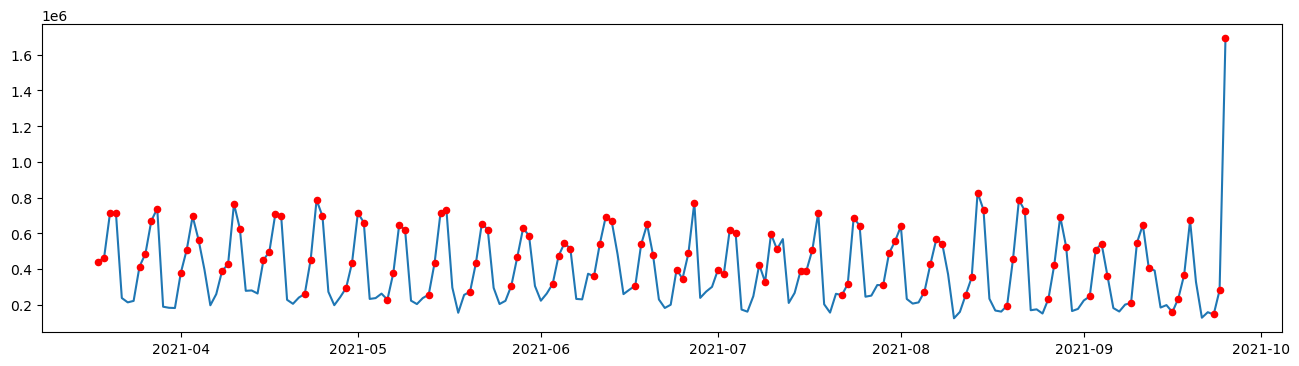

In [99]:
fig, ax = plt.subplots(1, figsize=(16,4))

ALF_2021_df = df_turnover_2021.loc['2021-03-18': '2021-09-25','SPORT_TURNOVER']
match_index = [i for i in ALF_2021_df.index if i.weekday() in [3,4,5,6]] 

ax.plot(ALF_2021_df, zorder=0)
ax.scatter(match_index, ALF_2021_df[match_index], s=20, c='r', zorder=1)

(0.0, 100.0)

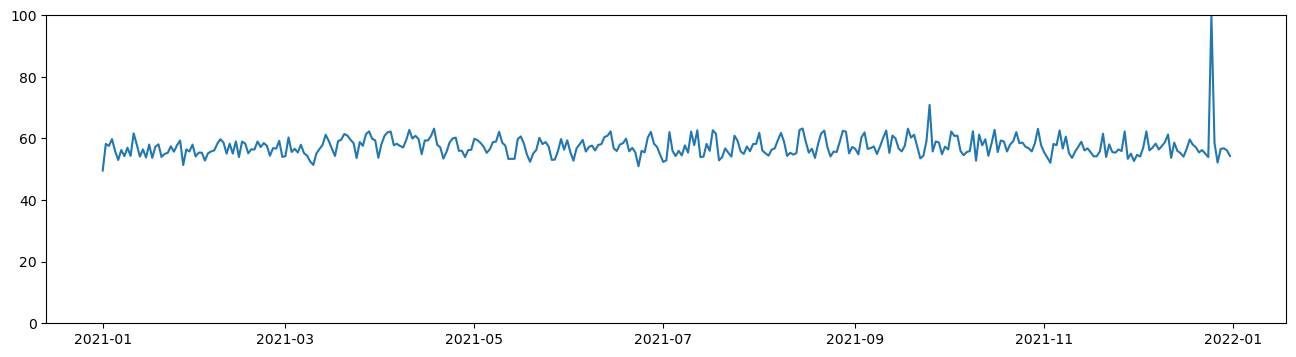

In [119]:
fig, ax = plt.subplots(1, figsize=(16,4))

ax.plot(df_turnover_2021['FOB_TURNOVER_PER'])
ax.set_ylim(0,100)